# Project Time Series practical Assignment

Assignment

Hint:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.tools.plotting import

autocorrelation_plot from

statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import datetime

import sys

import seaborn as sns

import statsmodels

import statsmodels.stats.diagnostic as diag

from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest


from matplotlib.pyplot import acorr

plt.style.use('fivethirtyeight')

%matplotlib inline

df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv')

df.head()

Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:

1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [57]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
Data = pd.read_csv("data_stocks.csv")

In [31]:
Data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [32]:
Data['DATE'].dtypes

dtype('int64')

In [33]:
Data['DATE'] = pd.to_datetime(Data['DATE'], unit='s')

In [34]:
Data['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [36]:
Data.index = Data['DATE']

In [37]:
Data.drop('DATE',axis = 1,inplace=True)

In [38]:
Data.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [42]:
Data_AAPL = Data[['NASDAQ.AAPL']].copy()

In [43]:
Data_AAPL.tail()

,NASDAQ.AAPL
DATE,
2017-08-31 19:56:00,164.11
2017-08-31 19:57:00,164.12
2017-08-31 19:58:00,164.01
2017-08-31 19:59:00,163.88
2017-08-31 20:00:00,163.98


In [44]:
Data_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

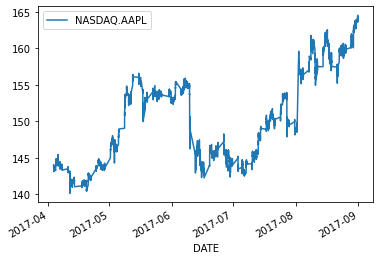

In [45]:
Data_AAPL.plot()
plt.show()

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf()
plt.show()

TypeError: plot_acf() missing 1 required positional argument: 'x'

## Converting series to stationary

In [15]:
Data_AAPL.shift(1)

,NASDAQ.AAPL
0,NaN
1,143.6800
2,143.7000
3,143.6901
4,143.6400
...,...
41261,164.1400
41262,164.1100
41263,164.1200
41264,164.0100


In [62]:
X = Data_AAPL.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


## ARIMA model

In [63]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [64]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 170326.97204460824
(0, 0, 1) 131018.03599865199
(0, 0, 2) 95780.67244459354
(0, 0, 3) 67525.18962516446
(0, 0, 4) 45787.34709203318
(0, 1, 0) -64708.71200636141
(0, 1, 1) -64706.87731534064
(0, 1, 2) -64718.28609667202
(0, 1, 3) -64719.67999909354
(0, 1, 4) -64724.746502434966
(0, 1, 5) -64723.27395757094
(0, 2, 0) -44617.132207470146
(0, 2, 1) -64678.29074322841
(0, 2, 2) -64676.476066321644
(0, 2, 3) -64688.12778472666
(0, 2, 4) -64689.288416560375
(0, 2, 5) -64694.18628541623
(1, 0, 0) -64703.10601217256
(1, 0, 1) -64701.259969238454
(1, 0, 2) -64712.56738380669
(1, 0, 3) -64714.0138170165
(1, 0, 4) -64719.00741388358
(1, 0, 5) -64717.51647147088
(1, 1, 0) -64706.870295588844
(1, 1, 1) -64709.61143441418
(1, 1, 2) -64725.38695947452
(1, 1, 3) -64723.394925341694
(1, 1, 4) -64724.05657394267
(1, 1, 5) -64722.094123734816
(1, 2, 0) -52566.600243591165
(1, 2, 1) -64686.66075126214
(1, 2, 2) -64694.12861841575
(1, 2, 3) -64694.9937283639
(1, 2, 4) -64699.299839981846
(1, 2, 5)

In [66]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94384588422


In [67]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361404, 150.6150715 , 150.61484582, ..., 153.5841701 ,
       153.58441004, 153.58464998])

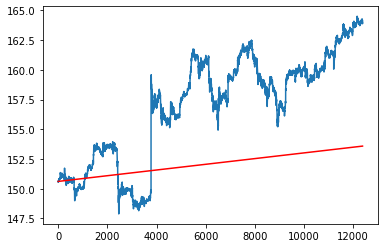

In [68]:
plt.plot(test)
plt.plot(predictions, color='red')

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.5506047216715